<a href="https://colab.research.google.com/github/Junhojuno/keras-tutorial/blob/master/06_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print("쌩 데이터 shape : {} {}".format(input_train.shape, input_test.shape))
print(input_train.dtype)

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print("시퀀스 패딩 후 데이터 shape : {} {}".format(input_train.shape, input_test.shape))
print(input_train.dtype)

쌩 데이터 shape : (25000,) (25000,)
object
시퀀스 패딩 후 데이터 shape : (25000, 500) (25000, 500)
int32


In [5]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=32))
model.add(LSTM(units=32)) # 나머진 default로 놓는다.
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

hist = model.fit(x=input_train, y=y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 128s 6ms/step - loss: 0.4972 - acc: 0.7694 - val_loss: 0.3303 - val_acc: 0.8698
Epoch 2/10
20000/20000 [==============================] - 126s 6ms/step - loss: 0.2930 - acc: 0.8849 - val_loss: 0.3123 - val_acc: 0.8660
Epoch 3/10
20000/20000 [==============================] - 126s 6ms/step - loss: 0.2344 - acc: 0.9117 - val_loss: 0.3456 - val_acc: 0.8588
Epoch 4/10
20000/20000 [==============================] - 125s 6ms/step - loss: 0.2043 - acc: 0.9231 - val_loss: 0.3476 - val_acc: 0.8478
Epoch 5/10
20000/20000 [==============================] - 126s 6ms/step - loss: 0.1750 - acc: 0.9365 - val_loss: 0.3115 - val_acc: 0.8896
Epoch 6/10
20000/20000 [==============================] - 124s 6ms/step - loss: 0.1610 - acc: 0.9419 - val_loss: 0.3294 - val_acc: 0.8686
Epo

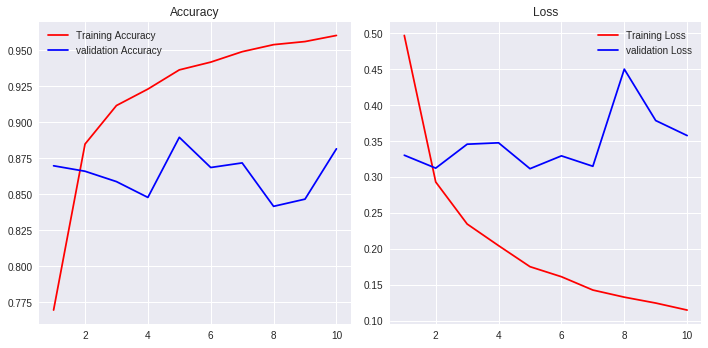

In [6]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist.history['acc']) + 1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(epochs, hist.history['acc'], 'r-', label="Training Accuracy")
plt.plot(epochs, hist.history['val_acc'], 'b-', label="validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, hist.history['loss'], 'r-', label="Training Loss")
plt.plot(epochs, hist.history['val_loss'], 'b-', label="validation Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

- 긴 sequence에서 simpleRNN보다 LSTM이 더 잘 작동한다.(gradient vanishing problem 해소)
- 하지만, 3장에서 다룬 IMDB데이터를 FCN으로 classification한것보다 성능이 월등히 높진 않았다.
- Hyper-Parameter tuning이나 regularization 등의 기법을 활용하지 않은 점도 있지만,
- 이러한 text classification에서는 FCN이 좀 더 효율적인 것 같다.(데이터를 자르지 않고 그대로 사용해서)